In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sktime.classification.kernel_based import RocketClassifier
import numpy as np
from sktime.transformations.panel.padder import PaddingTransformer
from sklearn.metrics import precision_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

from sktime.transformations.panel.rocket import MiniRocketMultivariate
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import multilabel_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

## import data

In [2]:
df0 = pd.read_csv("ProjectData\\0.csv")
df1 = pd.read_csv("ProjectData\\1.csv")
df2 = pd.read_csv("ProjectData\\2.csv")
df3 = pd.read_csv("ProjectData\\3.csv")
df4 = pd.read_csv("ProjectData\\4.csv")
df5 = pd.read_csv("ProjectData\\5.csv")
df6 = pd.read_csv("ProjectData\\6.csv")
df7 = pd.read_csv("ProjectData\\7.csv")
df8 = pd.read_csv("ProjectData\\8.csv")
df9 = pd.read_csv("ProjectData\\9.csv")
df10 = pd.read_csv("ProjectData\\10.csv")
df11 = pd.read_csv("ProjectData\\11.csv")
df12 = pd.read_csv("ProjectData\\12.csv")
df13 = pd.read_csv("ProjectData\\13.csv")
df14 = pd.read_csv("ProjectData\\14.csv")
df15 = pd.read_csv("ProjectData\\15.csv")
df16 = pd.read_csv("ProjectData\\16.csv")
df17 = pd.read_csv("ProjectData\\17.csv")
df18 = pd.read_csv("ProjectData\\18.csv")
df19 = pd.read_csv("ProjectData\\19.csv")
df20 = pd.read_csv("ProjectData\\20.csv")
df21 = pd.read_csv("ProjectData\\21.csv")
df22 = pd.read_csv("ProjectData\\22.csv")
df23 = pd.read_csv("ProjectData\\23.csv")
df24 = pd.read_csv("ProjectData\\24.csv")

## Accuracy per input

In [3]:
tests = []
preds = []
accuracys = []
for j in range(0,21):
    df=[]
    name_y=[]
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
    data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for d in df:
        data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

    padder = PaddingTransformer()
    padder.fit(data_df)
    data_df= padder.transform(data_df)
    X_train = data_df.loc[:74,:]
    y_train = name_y[:75]
    X_test = data_df.loc[75:,:]
    y_test = name_y[75:]
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    
    trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
    trf.fit(X_train)
    X_train_tr = trf.transform(X_train) 
    X_test_tr = trf.transform(X_test) 
    
    classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
    classifier.fit(X_train_tr, y_train)
    y_pred = classifier.predict(X_test_tr)
    acc = accuracy_score(y_test, y_pred)
    
    tests.append(y_test)
    preds.append(y_pred)
    accuracys.append(acc)
    
    print(j, acc)

0 1.0
1 0.96
2 0.98
3 1.0
4 0.98
5 0.98
6 0.92
7 1.0
8 1.0
9 0.98
10 1.0
11 0.98
12 1.0
13 0.98
14 0.92
15 0.98
16 1.0
17 1.0
18 0.96
19 0.94
20 0.98


## EER per input

In [4]:
ind =0
ees = []
for y in tests:
    y_test = y
    y_pred = preds[ind]
    EERs= []
    for i in range(0,21):
        tt = []
        pr = []
        for t in y_test:
            if t==i:
                tt.append(1)
            else:
                tt.append(0)
        for t in y_pred:
            if t==i:
                pr.append(1)
            else:
                pr.append(0)
        fpr, tpr, threshold = roc_curve(tt, pr, pos_label=1)
        fnr = 1 - tpr
        eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
        EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
#         print(EER)
        EERs.append(EER)
    ind+=1
    
    ees.append(np.mean(EERs)*100)
print(ees)

[0.0, 0.0992063492063492, 0.0992063492063492, 0.0, 0.0992063492063492, 0.0, 0.3968253968253968, 0.0, 0.0, 0.0992063492063492, 0.0, 0.0992063492063492, 0.0, 0.0, 0.3968253968253968, 0.0992063492063492, 0.0, 0.0, 0.0, 0.2976190476190476, 0.0992063492063492]


## Text dependent

## Lowercase vs uppercase

In [5]:
lower = [2,4,6,8,10,12,14]
upper = [3,5,7,9,11,13,15]

### lowercase

In [6]:
tests = []
preds = []
accuracys = []
df=[]
name_y=[]
# for j in range(0,21):
for j in lower:
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

ind = 0
tr = []
te = []
for i in range(0,875):
    if(ind<75):
        tr.append(i)
        ind += 1
    else:
        te.append(i)
        ind += 1
        if(ind==125):
            ind=0

X_train = data_df.loc[tr,:]
y_train=[]
for t in tr:
    y_train.append(name_y[t])
X_test = data_df.loc[te,:]
y_test=[]
for t in te:
    y_test.append(name_y[t])

#d
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)

# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)

0.9885714285714285


### Uppercase

In [7]:
for j in upper:
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

ind = 0
tr = []
te = []
for i in range(0,875):
    if(ind<75):
        tr.append(i)
        ind += 1
    else:
        te.append(i)
        ind += 1
        if(ind==125):
            ind=0

X_train = data_df.loc[tr,:]
y_train=[]
for t in tr:
    y_train.append(name_y[t])
X_test = data_df.loc[te,:]
y_test=[]
for t in te:
    y_test.append(name_y[t])

#d
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)

# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)

0.9885714285714285


## Text-independent

## Lowercase vs Uppercase

### lowercase: train on carnivorous, vegetarian, pineapple, handwriting, test on security, computer, hello world

In [8]:
tests = []
preds = []
accuracys = []
df=[]
name_y=[]
# for j in range(0,21):
for j in lower:
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

X_train = data_df.loc[:499,:]
y_train = name_y[:500]
X_test = data_df.loc[500:,:]
y_test = name_y[500:]
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)

# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)

0.8453333333333334


### uppercase: train on carnivorous, vegetarian, pineapple, handwriting, test on security, computer, hello world

In [9]:
tests = []
preds = []
accuracys = []
df=[]
name_y=[]
# for j in range(0,21):
for j in upper:
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

X_train = data_df.loc[:499,:]
y_train = name_y[:500]
X_test = data_df.loc[500:,:]
y_test = name_y[500:]
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)

# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)

0.848


## Text-independent: train on quick brown fox, test on security

In [10]:
df=[]
name_y=[]

for i in range(86,91):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

X_train = data_df
y_train = np.asarray(name_y)

df=[]
name_y=[]

for i in range(51,56):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder.fit(data_df)
data_df= padder.transform(data_df)

X_test = data_df
y_test = np.asarray(name_y)




trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)

# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)
# print(y_train)
# print(y_test)
# print(y_pred)

0.04


## Text-independent: train on all lowercase words, test on quick brown fox

In [11]:
df=[]
name_y=[]

for j in lower:
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

# padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

X_train = data_df
y_train = np.asarray(name_y)

df=[]
name_y=[]

for i in range(86,91):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)
        
data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder.fit(data_df)
data_df= padder.transform(data_df)

X_test = data_df
y_test = np.asarray(name_y)




trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)

# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)
# print(y_train)
# print(y_test)
# print(y_pred)

0.552


## Big model: all upper, lowercase, words and sentences. not name

In [12]:
df=[]
name_y=[]
for i in range(11,91):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

ind = 0
tr = []
te = []
for i in range(0,2000):
    if(ind<75):
        tr.append(i)
        ind += 1
    else:
        te.append(i)
        ind += 1
        if(ind==125):
            ind=0

X_train = data_df.loc[tr,:]

# print(te)
# print(tr)
y_train=[]
for t in tr:
    y_train.append(name_y[t])
X_test = data_df.loc[te,:]
y_test=[]
for t in te:
    y_test.append(name_y[t])

#d
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# print(name_y)
# print(y_test)

trf =MiniRocketMultivariate(num_kernels=10000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)


# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)

0.98375


## Big model: all upper, lowercase, only words

In [13]:
df=[]
name_y=[]
for i in range(11,71):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

ind = 0
tr = []
te = []
for i in range(0,1500):
    if(ind<75):
        tr.append(i)
        ind += 1
    else:
        te.append(i)
        ind += 1
        if(ind==125):
            ind=0

X_train = data_df.loc[tr,:]

# print(te)
# print(tr)
y_train=[]
for t in tr:
    y_train.append(name_y[t])
X_test = data_df.loc[te,:]
y_test=[]
for t in te:
    y_test.append(name_y[t])

#d
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# print(name_y)
# print(y_test)

trf =MiniRocketMultivariate(num_kernels=10000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
y_pred = classifier.predict(X_test_tr)
acc = accuracy_score(y_test, y_pred)


# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)

0.9916666666666667


## 25 confusion matrix

<Figure size 2160x2160 with 0 Axes>

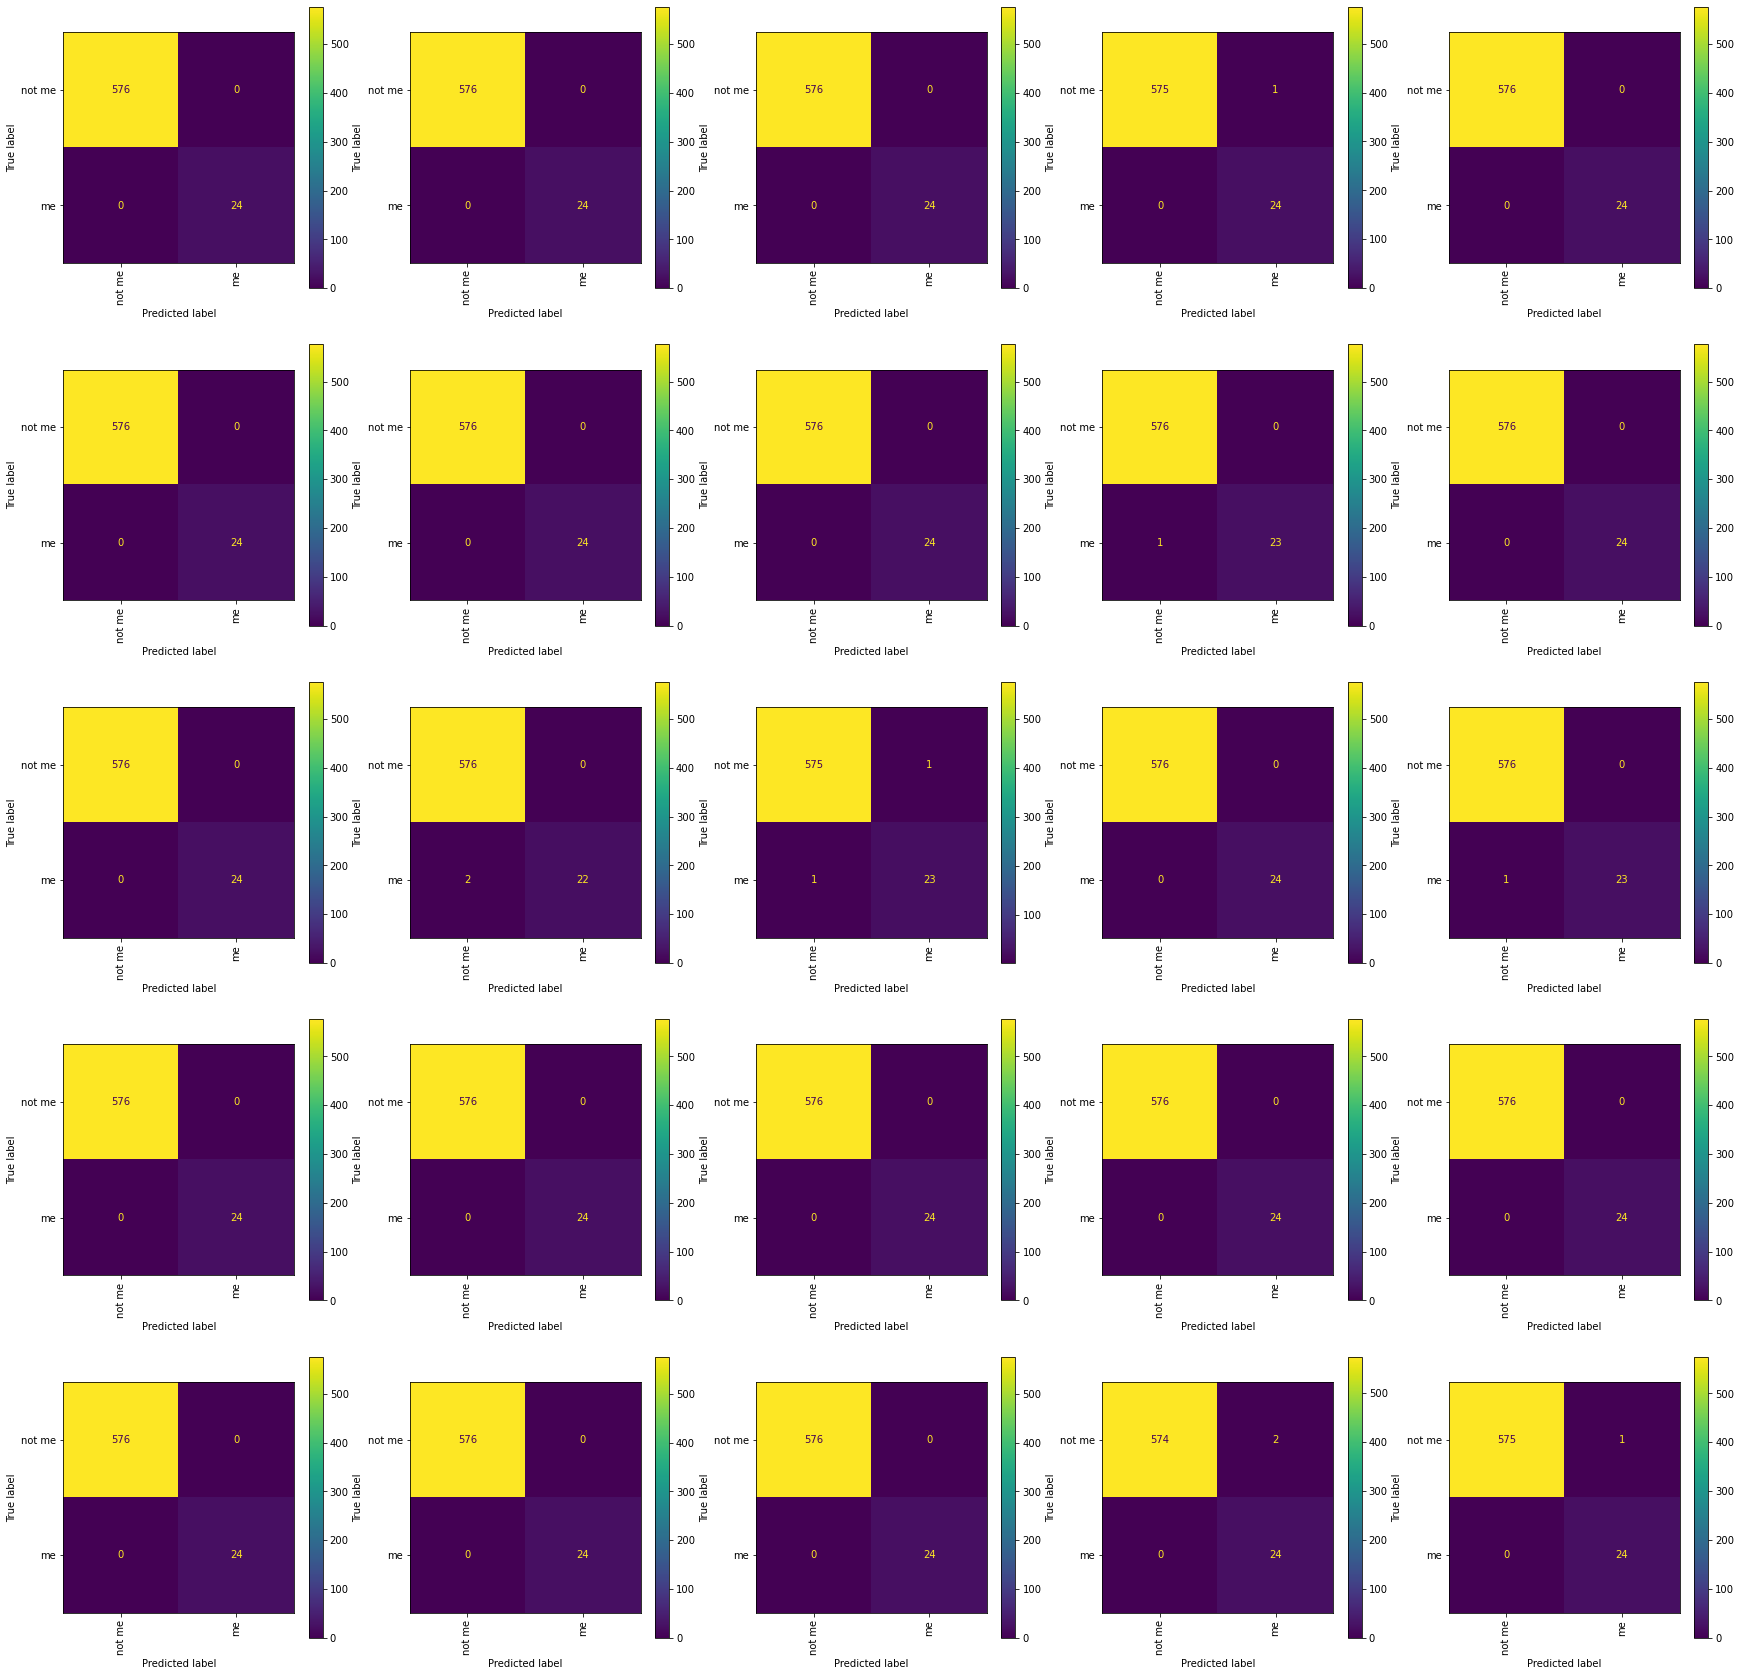

In [14]:
cf= multilabel_confusion_matrix(y_test, y_pred)
plt.figure(figsize=(30,30))
fig, axes = plt.subplots(5,5,figsize=(30,30))

for i, confusion_matrix in enumerate(cf):
    disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=["not me","me"])
    ax = axes[int(np.floor(i/5)), i%5]
    disp.plot(include_values=True, cmap="viridis", ax=ax, xticks_rotation="vertical")
    
    
#     plt.subplot(int(np.floor(i/5+1)), i%5+1,i+1)
plt.show()

### 25x25 confusion matrix

In [15]:
# print(y_test)
# print(y_pred)
big_cf = [[0 for i in range(25)] for j in range(25)]
for i in range(len(y_test)):
# for i in range(2):
    if y_test[i]==y_pred[i]:
#         print(big_cf)
        big_cf[y_test[i]][y_test[i]]=big_cf[y_test[i]][y_test[i]]+1
#         print(big_cf)
    else:
#         print(y_test[i], y_pred[i])
        big_cf[y_test[i]][y_pred[i]]=big_cf[y_test[i]][y_pred[i]]+1
# print(big_cf)

In [16]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(30, 30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

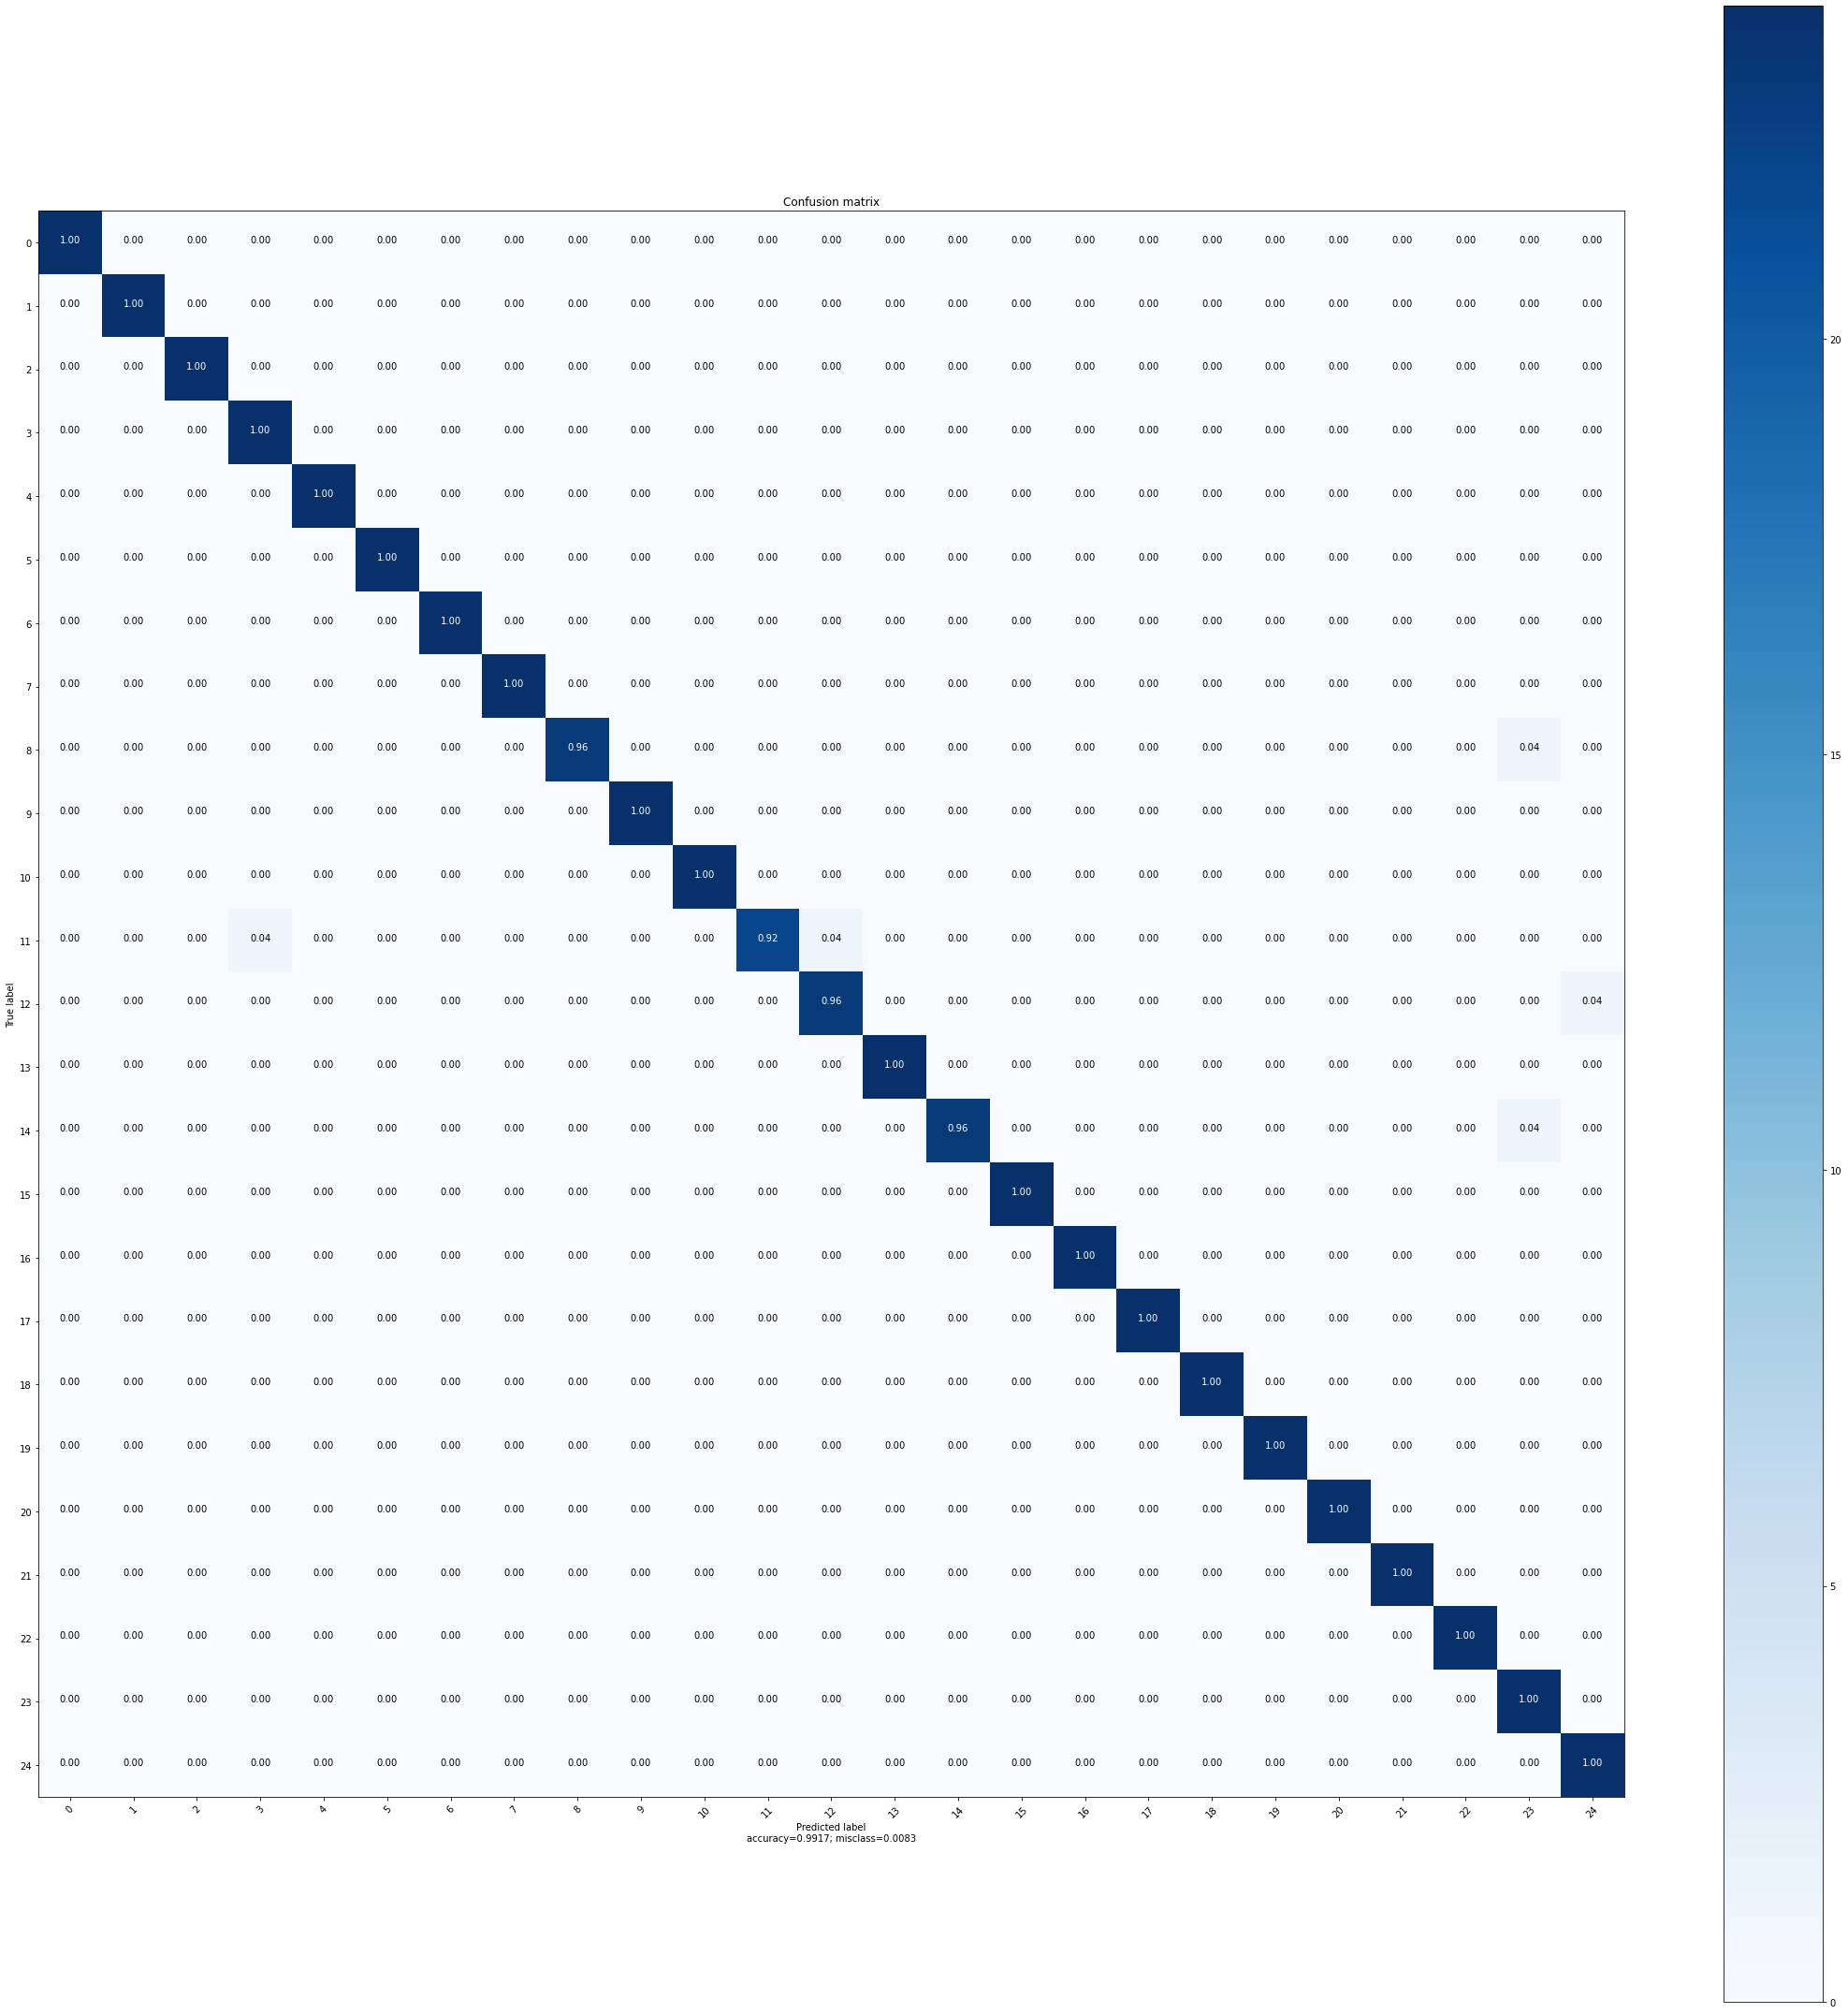

In [17]:
cc = np.asarray(big_cf)
# plt.figure(figsize=(30,30))
plot_confusion_matrix(cm=cc,target_names=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

## EER (OVR) for big model words

In [18]:
EERs= []
for i in range(0,25):
    tt = []
    pr = []
    for t in y_test:
        if t==i:
            tt.append(1)
        else:
            tt.append(0)
    for t in y_pred:
        if t==i:
            pr.append(1)
        else:
            pr.append(0)
    fpr, tpr, threshold = roc_curve(tt, pr, pos_label=1)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
    EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
#     print(EER)
    EERs.append(EER)


print(np.mean(EERs)*100)

0.034722222222222224


## One model each, for all words

In [20]:
df=[]
name_y=[]
for i in range(11,71):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

acccs = []
classifs =[]
for i in range(0,25):
    tt = []
    pr = []
    for t in name_y:
        if t==i:
            tt.append(1)
        else:
            tt.append(0)

    ind = 0
    tr = []
    te = []
    for i in range(0,1500):
        if(ind<75):
            tr.append(i)
            ind += 1
        else:
            te.append(i)
            ind += 1
            if(ind==125):
                ind=0

    X_train = data_df.loc[tr,:]

    # print(te)
    # print(tr)
    y_train=[]
    for t in tr:
        y_train.append(tt[t])
    X_test = data_df.loc[te,:]
    y_test=[]
    for t in te:
        y_test.append(tt[t])

    #d
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    # print(name_y)
    # print(y_test)

    trf =MiniRocketMultivariate(num_kernels=10000, max_dilations_per_kernel=16)
    trf.fit(X_train)
    X_train_tr = trf.transform(X_train) 
    X_test_tr = trf.transform(X_test) 

    classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
    classifier.fit(X_train_tr, y_train)
    y_pred = classifier.predict(X_test_tr)
    acc = accuracy_score(y_test, y_pred)


    # tests.append(y_test)
    # preds.append(y_pred)
    # accuracys.append(acc)
    classifs.append(classifier)
    acccs.append(acc)
    print(acc)

1.0
0.9883333333333333
0.995
1.0
0.9916666666666667
1.0
1.0
0.9966666666666667
0.9983333333333333
1.0
0.9933333333333333
0.9983333333333333
0.9883333333333333
0.9966666666666667
0.995
0.98
0.9933333333333333
0.9966666666666667
0.9966666666666667
0.9916666666666667
0.995
0.9983333333333333
0.995
0.9966666666666667
1.0


In [43]:
ff = pd.read_csv("ProjectData\\skilledForgeElina.csv")
df=[]
name_y=[]
for j in range(2,14):
    for i in range(1,4):
        df.append(ff.loc[ff['SampleNum'] == i+j*5])
    
print(df[0])

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for i in range(len(df)):
    data_df.loc[len(data_df.index)]= [df[i]['altitude'].squeeze(), df[i]['azimuth'].squeeze(),df[i]['force'].squeeze(),df[i]['x'].squeeze(),df[i]['y'].squeeze()]

# padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

ff_test = trf.transform(data_df)
pred= classifs[5].predict(ff_test)

# acc = accuracy_score(y_test, y_pred)
# print(acc)
print(pred)

      altitude   azimuth  force           x           y  timeOffset  \
1692  0.976897  1.119583  0.082  277.268677   93.420471    0.000000   
1693  0.976897  1.119583  0.097  276.350403   92.231812    0.125000   
1694  0.976897  1.119583  0.098  274.819946   92.169250    0.163000   
1695  0.976897  1.119583  0.098  272.317200   92.169250    0.192000   
1696  0.976897  1.119583  0.098  270.462647   92.832397    0.209000   
...        ...       ...    ...         ...         ...         ...   
1928  1.024187  1.304143  0.188  450.228272  113.465027   25.969099   
1929  1.024187  1.298678  0.125  448.049622  114.979004   25.974099   
1930  1.024187  1.292926  0.072  446.015015  116.092590   25.978099   
1931  1.024187  1.286982  0.040  444.034424  117.218689   25.982099   
1932  1.024187  1.280846  0.010  442.107849  118.407349   25.986099   

      strokeNum  SampleNum sampleTarget  
1692          1         11  carnivorous  
1693          1         11  carnivorous  
1694          1      

In [44]:
df=[]
name_y=[]
for i in range(11,71):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

# ind = 0
# tr = []
# te = []
# for i in range(0,1500):
#     if(ind<75):
#         tr.append(i)
#         ind += 1
#     else:
#         te.append(i)
#         ind += 1
#         if(ind==125):
#             ind=0

X_train = data_df

# # print(te)
# # print(tr)
# y_train=[]
# for t in tr:
#     y_train.append(name_y[t])
# X_test = data_df.loc[te,:]
# y_test=[]
# for t in te:
#     y_test.append(name_y[t])

#d
y_train = np.asarray(name_y)
# y_test = np.asarray(y_test)

# print(name_y)
# print(y_test)

trf =MiniRocketMultivariate(num_kernels=10000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 
# X_test_tr = trf.transform(X_test) 

classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, y_train)
# y_pred = classifier.predict(X_test_tr)
# acc = accuracy_score(y_test, y_pred)


# tests.append(y_test)
# preds.append(y_pred)
# accuracys.append(acc)

print(acc)



ff = pd.read_csv("ProjectData\\skilledForgeElina.csv")
df=[]
name_y=[]
for j in range(2,14):
    for i in range(1,4):
        df.append(ff.loc[ff['SampleNum'] == i+j*5])
    
print(df[0])

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for i in range(len(df)):
    data_df.loc[len(data_df.index)]= [df[i]['altitude'].squeeze(), df[i]['azimuth'].squeeze(),df[i]['force'].squeeze(),df[i]['x'].squeeze(),df[i]['y'].squeeze()]

# padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

ff_test = trf.transform(data_df)
pred= classifier.predict(ff_test)

# acc = accuracy_score(y_test, y_pred)
# print(acc)
print(pred)

1.0
      altitude   azimuth  force           x           y  timeOffset  \
1692  0.976897  1.119583  0.082  277.268677   93.420471    0.000000   
1693  0.976897  1.119583  0.097  276.350403   92.231812    0.125000   
1694  0.976897  1.119583  0.098  274.819946   92.169250    0.163000   
1695  0.976897  1.119583  0.098  272.317200   92.169250    0.192000   
1696  0.976897  1.119583  0.098  270.462647   92.832397    0.209000   
...        ...       ...    ...         ...         ...         ...   
1928  1.024187  1.304143  0.188  450.228272  113.465027   25.969099   
1929  1.024187  1.298678  0.125  448.049622  114.979004   25.974099   
1930  1.024187  1.292926  0.072  446.015015  116.092590   25.978099   
1931  1.024187  1.286982  0.040  444.034424  117.218689   25.982099   
1932  1.024187  1.280846  0.010  442.107849  118.407349   25.986099   

      strokeNum  SampleNum sampleTarget  
1692          1         11  carnivorous  
1693          1         11  carnivorous  
1694          1  

In [49]:
df=[]
name_y=[]
for i in range(11,71):
    df.append(df0.loc[df0['SampleNum'] == i])
    name_y.append(0)
    df.append((df1.loc[df1['SampleNum'] == i]))
#     df1.reset_index(drop=True)
    name_y.append(1)
    df.append(df2.loc[df2['SampleNum'] == (i)])
    name_y.append(2)
    df.append(df3.loc[df3['SampleNum'] == i])
    name_y.append(3)
    df.append(df4.loc[df4['SampleNum'] == i])
    name_y.append(4)
    df.append(df5.loc[df5['SampleNum'] == i])
    name_y.append(5)
    df.append(df6.loc[df6['SampleNum'] == i])
    name_y.append(6)
    df.append(df7.loc[df7['SampleNum'] == i])
    name_y.append(7)
    df.append(df8.loc[df8['SampleNum'] == i])
    name_y.append(8)
    df.append(df9.loc[df9['SampleNum'] == i])
    name_y.append(9)
    df.append(df10.loc[df10['SampleNum'] == i])
    name_y.append(10)
    df.append(df11.loc[df11['SampleNum'] == i])
    name_y.append(11)
    df.append(df12.loc[df12['SampleNum'] == i])
    name_y.append(12)
    df.append(df13.loc[df13['SampleNum'] == i])
    name_y.append(13)
    df.append(df14.loc[df14['SampleNum'] == i])
    name_y.append(14)
    df.append(df15.loc[df15['SampleNum'] == i])
    name_y.append(15)
    df.append(df16.loc[df16['SampleNum'] == i])
    name_y.append(16)
    df.append(df17.loc[df17['SampleNum'] == i])
    name_y.append(17)
    df.append(df18.loc[df18['SampleNum'] == i])
    name_y.append(18)
    df.append(df19.loc[df19['SampleNum'] == i])
    name_y.append(19)
    df.append(df20.loc[df20['SampleNum'] == i])
    name_y.append(20)
    df.append(df21.loc[df21['SampleNum'] == i])
    name_y.append(21)
    df.append(df22.loc[df22['SampleNum'] == i])
    name_y.append(22)
    df.append(df23.loc[df23['SampleNum'] == i])
    name_y.append(23)
    df.append(df24.loc[df24['SampleNum'] == i])
    name_y.append(24)

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for d in df:
    data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

# acccs = []
# classifs =[]

tt = []
pr = []
for t in name_y:
    if t==15:
        tt.append(1)
    else:
        tt.append(0)



X_train = data_df


y_test = np.asarray(tt)

# print(name_y)
# print(y_test)

trf =MiniRocketMultivariate(num_kernels=10000, max_dilations_per_kernel=16)
trf.fit(X_train)
X_train_tr = trf.transform(X_train) 


classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
classifier.fit(X_train_tr, tt)


ff = pd.read_csv("ProjectData\\skilledForgeElina.csv")
df=[]
name_y=[]
for j in range(2,14):
    for i in range(1,4):
        df.append(ff.loc[ff['SampleNum'] == i+j*5])
    
# print(df[0])

data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
for i in range(len(df)):
    data_df.loc[len(data_df.index)]= [df[i]['altitude'].squeeze(), df[i]['azimuth'].squeeze(),df[i]['force'].squeeze(),df[i]['x'].squeeze(),df[i]['y'].squeeze()]

# padder = PaddingTransformer()
padder.fit(data_df)
data_df= padder.transform(data_df)

ff_test = trf.transform(data_df)
pred= classifier.predict(ff_test)

# acc = accuracy_score(y_test, y_pred)
# print(acc)
print(pred)


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [56]:
tests = []
preds = []
accuracys = []
ff = pd.read_csv("ProjectData\\skilledForgeElina.csv")
for j in range(0,21):
    df=[]
    name_y=[]
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
        
    dff=[]
    for i in range(1,4):
        dff.append(ff.loc[ff['SampleNum'] == i+j*5])
        
    data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for d in df:
        data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

    padder = PaddingTransformer()
    padder.fit(data_df)
    data_df= padder.transform(data_df)
    X_train = data_df
    y_train = np.asarray(name_y)
    
    trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
    trf.fit(X_train)
    X_train_tr = trf.transform(X_train) 
#     X_test_tr = trf.transform(X_test) 
    
    classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
    classifier.fit(X_train_tr, y_train)
#     y_pred = classifier.predict(X_test_tr)
#     acc = accuracy_score(y_test, y_pred)
    

    # print(df[0])

    data_forged = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for i in range(len(dff)):
        data_forged.loc[len(data_forged.index)]= [dff[i]['altitude'].squeeze(), dff[i]['azimuth'].squeeze(),dff[i]['force'].squeeze(),dff[i]['x'].squeeze(),dff[i]['y'].squeeze()]

    # padder = PaddingTransformer()
    padder.fit(data_forged)
    data_forged= padder.transform(data_forged)

    ff_test = trf.transform(data_forged)
    pred= classifier.predict(ff_test)
    
    
#     tests.append(y_test)
#     preds.append(y_pred)
#     accuracys.append(acc)
    print(j, pred)
    
#     print(j, acc)

0 [8 2 2]
1 [18 18 18]
2 [1 1 1]
3 [5 5 5]
4 [5 5 5]
5 [19 19 19]
6 [8 8 8]
7 [1 1 1]
8 [10 10 10]
9 [2 2 2]
10 [5 5 5]
11 [5 5 5]
12 [22 22 22]
13 [0 0 0]
14 [7 7 7]
15 [0 0 0]
16 [3 3 5]
17 [21 12 21]
18 [18 18 18]
19 [22 22 22]
20 [11  6 11]


In [57]:
tests = []
preds = []
accuracys = []
ff = pd.read_csv("ProjectData\\skilledForgeElina.csv")
for j in range(0,21):
    df=[]
    name_y=[]
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(1)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(0)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(0)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(0)
        
        
    dff=[]
    for i in range(1,4):
        dff.append(ff.loc[ff['SampleNum'] == i+j*5])
        
    data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for d in df:
        data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

    padder = PaddingTransformer()
    padder.fit(data_df)
    data_df= padder.transform(data_df)
    X_train = data_df
    y_train = np.asarray(name_y)
    
    trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
    trf.fit(X_train)
    X_train_tr = trf.transform(X_train) 
#     X_test_tr = trf.transform(X_test) 
    
    classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
    classifier.fit(X_train_tr, y_train)
#     y_pred = classifier.predict(X_test_tr)
#     acc = accuracy_score(y_test, y_pred)
    

    # print(df[0])

    data_forged = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for i in range(len(dff)):
        data_forged.loc[len(data_forged.index)]= [dff[i]['altitude'].squeeze(), dff[i]['azimuth'].squeeze(),dff[i]['force'].squeeze(),dff[i]['x'].squeeze(),dff[i]['y'].squeeze()]

    # padder = PaddingTransformer()
    padder.fit(data_forged)
    data_forged= padder.transform(data_forged)

    ff_test = trf.transform(data_forged)
    pred= classifier.predict(ff_test)
    
    
#     tests.append(y_test)
#     preds.append(y_pred)
#     accuracys.append(acc)
    print(j, pred)
    
#     print(j, acc)

0 [0 0 0]
1 [0 0 0]
2 [0 0 0]
3 [0 0 0]
4 [0 0 0]
5 [1 1 1]
6 [0 0 0]
7 [1 1 1]
8 [1 1 1]
9 [1 1 1]
10 [1 1 1]
11 [0 0 0]
12 [0 1 1]
13 [1 1 1]
14 [1 1 1]
15 [1 1 1]
16 [0 0 0]
17 [0 0 0]
18 [0 0 0]
19 [1 1 1]
20 [0 0 0]


In [58]:
tests = []
preds = []
accuracys = []
ff = pd.read_csv("ProjectData\\skilledForgeEylul.csv")
for j in range(0,21):
    df=[]
    name_y=[]
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(2)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(3)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(4)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(5)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(6)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(7)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(8)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(9)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(10)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(11)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(12)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(13)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(14)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(15)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(16)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(17)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(18)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(19)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(20)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(21)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(22)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(23)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(24)
        
        
    dff=[]
    for i in range(1,4):
        dff.append(ff.loc[ff['SampleNum'] == i+j*5])
        
    data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for d in df:
        data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

    padder = PaddingTransformer()
    padder.fit(data_df)
    data_df= padder.transform(data_df)
    X_train = data_df
    y_train = np.asarray(name_y)
    
    trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
    trf.fit(X_train)
    X_train_tr = trf.transform(X_train) 
#     X_test_tr = trf.transform(X_test) 
    
    classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
    classifier.fit(X_train_tr, y_train)
#     y_pred = classifier.predict(X_test_tr)
#     acc = accuracy_score(y_test, y_pred)
    

    # print(df[0])

    data_forged = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for i in range(len(dff)):
        data_forged.loc[len(data_forged.index)]= [dff[i]['altitude'].squeeze(), dff[i]['azimuth'].squeeze(),dff[i]['force'].squeeze(),dff[i]['x'].squeeze(),dff[i]['y'].squeeze()]

    # padder = PaddingTransformer()
    padder.fit(data_forged)
    data_forged= padder.transform(data_forged)

    ff_test = trf.transform(data_forged)
    pred= classifier.predict(ff_test)
    
    
#     tests.append(y_test)
#     preds.append(y_pred)
#     accuracys.append(acc)
    print(j, pred)
    
#     print(j, acc)

0 [9 9 1]
1 [23 23  9]
2 [18 18 18]
3 [ 9 22 22]
4 [5 5 5]
5 [19 19 19]
6 [15 15 15]
7 [15 15 15]
8 [4 4 4]
9 [9 9 9]
10 [9 5 5]
11 [10 10 10]
12 [22 22 22]
13 [9 9 9]
14 [ 6 19 19]
15 [4 4 4]
16 [6 6 6]
17 [10 10 10]
18 [6 6 6]
19 [20 20 20]
20 [6 6 6]


In [60]:
tests = []
preds = []
accuracys = []
ff = pd.read_csv("ProjectData\\skilledForgeEylul.csv")
for j in range(0,21):
    df=[]
    name_y=[]
    for i in range(1,6):
        df.append(df0.loc[df0['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append((df1.loc[df1['SampleNum'] == i+j*5]))
    #     df1.reset_index(drop=True)
        name_y.append(1)
        df.append(df2.loc[df2['SampleNum'] == (i+j*5)])
        name_y.append(0)
        df.append(df3.loc[df3['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df4.loc[df4['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df5.loc[df5['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df6.loc[df6['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df7.loc[df7['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df8.loc[df8['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df9.loc[df9['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df10.loc[df10['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df11.loc[df11['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df12.loc[df12['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df13.loc[df13['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df14.loc[df14['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df15.loc[df15['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df16.loc[df16['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df17.loc[df17['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df18.loc[df18['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df19.loc[df19['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df20.loc[df20['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df21.loc[df21['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df22.loc[df22['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df23.loc[df23['SampleNum'] == i+j*5])
        name_y.append(0)
        df.append(df24.loc[df24['SampleNum'] == i+j*5])
        name_y.append(0)
        
        
    dff=[]
    for i in range(1,4):
        dff.append(ff.loc[ff['SampleNum'] == i+j*5])
        
    data_df = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for d in df:
        data_df.loc[len(data_df.index)]= [d['altitude'].squeeze(), d['azimuth'].squeeze(),d['force'].squeeze(),d['x'].squeeze(),d['y'].squeeze()]

    padder = PaddingTransformer()
    padder.fit(data_df)
    data_df= padder.transform(data_df)
    X_train = data_df
    y_train = np.asarray(name_y)
    
    trf =MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=16)
    trf.fit(X_train)
    X_train_tr = trf.transform(X_train) 
#     X_test_tr = trf.transform(X_test) 
    
    classifier = RidgeClassifierCV(alphas=np.logspace(0, 3, 10), normalize=True)
    classifier.fit(X_train_tr, y_train)
#     y_pred = classifier.predict(X_test_tr)
#     acc = accuracy_score(y_test, y_pred)
    

    # print(df[0])

    data_forged = pd.DataFrame(columns=["altitude", "azimuth", "force", "x", "y"])
    for i in range(len(dff)):
        data_forged.loc[len(data_forged.index)]= [dff[i]['altitude'].squeeze(), dff[i]['azimuth'].squeeze(),dff[i]['force'].squeeze(),dff[i]['x'].squeeze(),dff[i]['y'].squeeze()]

    # padder = PaddingTransformer()
    padder.fit(data_forged)
    data_forged= padder.transform(data_forged)

    ff_test = trf.transform(data_forged)
    pred= classifier.predict(ff_test)
    
    
#     tests.append(y_test)
#     preds.append(y_pred)
#     accuracys.append(acc)
    print(j, pred)
    
#     print(j, acc)

0 [1 1 1]
1 [0 0 0]
2 [1 1 1]
3 [0 0 0]
4 [0 0 0]
5 [0 0 0]
6 [0 0 0]
7 [1 1 1]
8 [0 0 0]
9 [1 1 1]
10 [0 0 0]
11 [1 1 1]
12 [0 0 0]
13 [0 0 0]
14 [0 0 0]
15 [0 0 0]
16 [0 0 0]
17 [0 0 0]
18 [0 0 0]
19 [0 0 0]
20 [0 0 0]
